In [1]:
# importing libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import re

In [2]:
# loading data by using glob  & loop & concatenation all csv files
files = glob("states*")
us_census = pd.concat((pd.read_csv(file) for file in files ),ignore_index=True)
#del us_census["Unnamed: 0"]
#us_census.head()

In [3]:
files

['states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv']

In [4]:
# look .dtypes and .columns
d_types=us_census.dtypes
print("Data types of us_census : \n",d_types)
print('___________________________________')
col= us_census.columns
print("Column of us_census : \n",col)

Data types of us_census : 
 Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object
___________________________________
Column of us_census : 
 Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [5]:
# task 4 : look at the Data head Frame dtypes
#so that you can understand why some of these dtypes are objects
#instead of integers or floats.
us_census.head(2).dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [6]:
# Use regex to turn the Income column into a format 
# that is ready for conversion into a numerical type
us_census["Income"]=us_census["Income"].replace("\$"," ",regex=True)
us_census['Income'] = us_census['Income'].astype("float")
print("After conversion the Data type of income columns is  : ",us_census['Income'].dtypes)


After conversion the Data type of income columns is  :  float64


In [7]:
#Look at the GenderPop column
#going to separate this into two columns, the Men column, and the Women column.
us_census['GenderPop'][0]

'2341093M_2489527F'

In [9]:
# Split the column into those two new columns 
#using str.split and separating out columns in to male and female.
# Convert both of the columns into numerical datatypes.

split_gender = us_census['GenderPop'].str.split('_', expand=True)
us_census["female"]=split_gender[1].str.extract('(\d+)',expand=True)
us_census["female"]=pd.to_numeric(us_census["female"])
us_census["Male"]=split_gender[0].str.extract('(\d+)',expand=True)
us_census["Male"]=pd.to_numeric(us_census["Male"])


In [9]:
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
female        float64
Male            int64
dtype: object

In [12]:
us_census.drop(["GenderPop"],axis=1)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,female,Male
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2489527.0,2341093
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,349215.0,384160
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3342840.0,3299088
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1506295.0,1451913
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19334329.0,19087135
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2630239.0,2648667
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2630239.0,2648667
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1841615.0,1751607
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,478041.0,448413
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,340810.0,306674


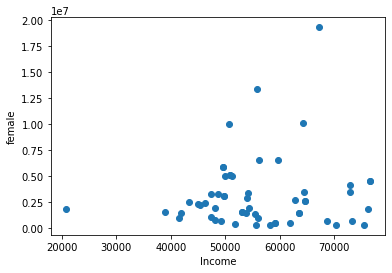

In [18]:
# Use matplotlib to make a scatterplot!
x=us_census["Income"]
y=us_census["female"]
plt.scatter(x,y)
plt.xlabel("Income")
plt.ylabel("female")
plt.show()

In [19]:
#Did you get an error? These monstrous csv files probably have nan values in them! 
#Print out your column with the number of women per state to see.
female_na_values = us_census["female"][us_census["female"].isnull()]
print(female_na_values)

23   NaN
24   NaN
31   NaN
Name: female, dtype: float64


In [12]:
# We can fill in those nans by using pandas’ .fillna() function.
#You have the TotalPop per state, and you have the Men per state. 
#As an estimate for the nan values in the Women column,
#you could use the TotalPop of that state minus the Men for that state.

total_pop=us_census["TotalPop"]-us_census["Male"]
us_census['female']=us_census['female'].fillna(value= total_pop)

In [13]:
# We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.
# Drop those duplicates using the .drop_duplicates() function.
duplicated_row = us_census[us_census.duplicated()]
us_census.drop_duplicates(keep='first',inplace=True)

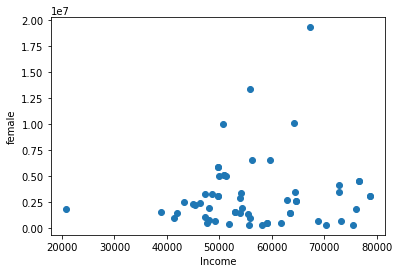

In [14]:
# Make the scatterplot again. Now, it should be perfect! 
# Your job is secure, for now.


plt.scatter(x,y)
plt.xlabel("Income")
plt.ylabel("female")
plt.show()


In [15]:
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,female,Male
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2489527.0,2341093
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,349215.0,384160
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3342840.0,3299088
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1506295.0,1451913
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19334329.0,19087135
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2630239.0,2648667
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2630239.0,2648667
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1841615.0,1751607
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,478041.0,448413
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,340810.0,306674


In [16]:
# Try to make a histogram for each one!
# You will have to get the columns into numerical format, 
# and those percentage signs will have to go.
#Don’t forget to fill the nan values with something that makes sense!
#You probably dropped the duplicate rows when making your last graph,
#but it couldn’t hurt to check for duplicates again.

In [21]:
us_census = us_census.replace('%*','',regex=True)
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]] =us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].apply(pd.to_numeric)
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].fillna(0)


,Hispanic,White,Black,Native,Asian,Pacific
0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354
1,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683
2,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632
3,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861
4,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410
5,20.784380,69.895572,3.546377,0.573833,2.661997,0.000000
6,20.784380,69.895572,3.546377,0.573833,2.661997,0.000000
7,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599
8,8.824766,64.632710,20.743925,0.259813,3.268692,0.000000
9,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609


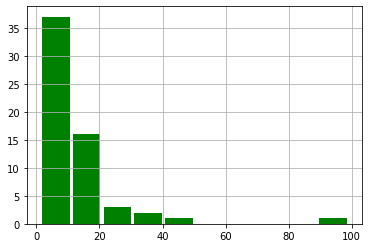

In [22]:
us_census['Hispanic'].hist(rwidth=0.89,color='green')

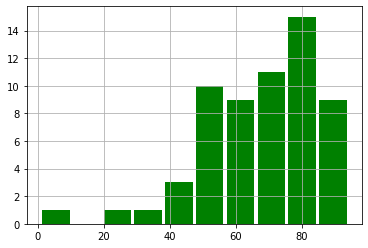

In [23]:
us_census['White'].hist(rwidth=0.89,color='green')

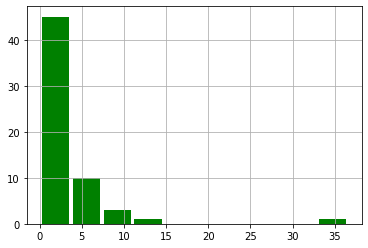

In [24]:
us_census['Asian'].hist(rwidth=0.89,color='green')

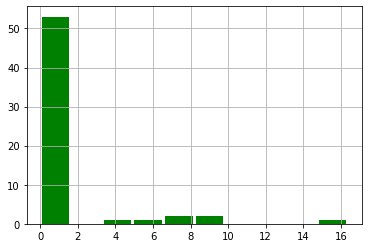

In [25]:
us_census['Native'].hist(rwidth=0.89,color='green')

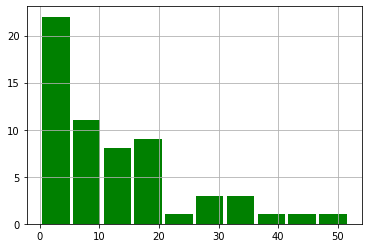

In [26]:
us_census['Black'].hist(rwidth=0.89,color='green')